# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Sep 24 (Tuesday) 11:00 pm </b> </font>

<font color="black"> Alekhya Majeti </font>

# Introduction

The main goal of this assignment is to get a clear understanding of how linear regression works. Also, find the relationship between the data to use for linear regression. 

# Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the regression data that you examined in Assignment #0. 

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


### Super Classs Definition

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')

df.head()

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [2]:
df = df.drop(['id', 'date'], axis=1)

print('# of data:', len(df), 'and # of features:', len(df.columns))


# of data: 21613 and # of features: 19


In [6]:
print(df.dtypes)
print(df.iloc[1:2])

price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
1  538000.0         3       2.25         2570      7242     2.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
1     0          3      7        2170            400      1951          1991   

   zipcode     lat     long  sqft_living15  sqft_lot15  
1    98125  47.721 -122.319           1690        7639  


In [12]:
print(len(df['price'].isnull()))


21613


In [13]:
target = df.iloc[:, 0].name
features = df.iloc[:, 1:].columns.tolist()
print(features)

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [14]:
correlations = df.corr()
correlations['price']

price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

In [15]:
# Remove features with correlation < 0.1
cor_target = abs(correlations['price'])
removed_features = cor_target[cor_target < 0.1]
print(removed_features)
df = df.drop(['sqft_lot', 'condition', 'yr_built', 'zipcode', 'long',
             'sqft_lot15'], axis=1)

sqft_lot      0.089661
condition     0.036362
yr_built      0.054012
zipcode       0.053203
long          0.021626
sqft_lot15    0.082447
Name: price, dtype: float64


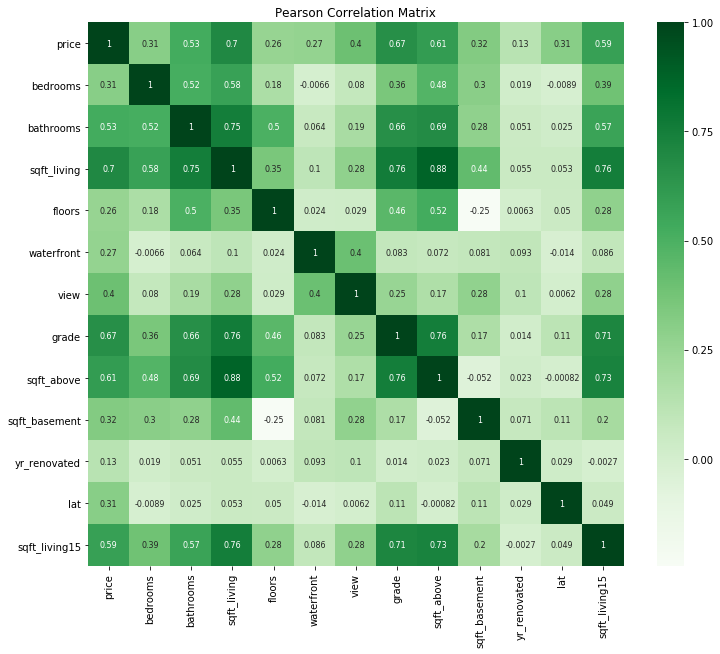

In [16]:
# Use Pearson correlation matrix
fig_1 = plt.figure(figsize=(12, 10))
new_correlations = df.corr()
sns.heatmap(new_correlations, annot=True, cmap='Greens', annot_kws={'size': 8})
plt.title('Pearson Correlation Matrix')
plt.show()

In [17]:
# Remove highly intercorrelated features
highly_correlated_features = new_correlations[new_correlations > 0.75]
print(highly_correlated_features.fillna('-'))
df = df.drop(['sqft_above', 'sqft_living15'], axis=1)


              price bedrooms bathrooms sqft_living floors waterfront view  \
price             1        -         -           -      -          -    -   
bedrooms          -        1         -           -      -          -    -   
bathrooms         -        -         1    0.754665      -          -    -   
sqft_living       -        -  0.754665           1      -          -    -   
floors            -        -         -           -      1          -    -   
waterfront        -        -         -           -      -          1    -   
view              -        -         -           -      -          -    1   
grade             -        -         -    0.762704      -          -    -   
sqft_above        -        -         -    0.876597      -          -    -   
sqft_basement     -        -         -           -      -          -    -   
yr_renovated      -        -         -           -      -          -    -   
lat               -        -         -           -      -          -    -   

In [18]:
# Update features and store their length
features = df.iloc[:, 1:].columns.tolist()
print(features)
len_of_features = len(features)

['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'grade', 'sqft_basement', 'yr_renovated', 'lat']


In [22]:
# Normalize the data
df = (df - df.mean())/df.std()
print(df['price'][0])

-0.86669727771455


In [84]:
num_of_rows = int((21613) * 0.8)

train_data = df.iloc[:num_of_rows] #indexes rows for training data
test_data = df.iloc[num_of_rows:] #indexes rows for test data

train_data.count()


# Create X, y and theta
X = train_data.iloc[:, 1:]
ones = np.ones([len(train_data), 1])
X = np.concatenate((ones, X), axis=1)
y = train_data.iloc[:, 0:1].values
theta = np.zeros([1, len_of_features + 1])

#print(X)


print (X.shape) #Take the first number from X_data.shape and store it in num_of_rows
print(y.shape)

print(test_data.iloc[0])

(17290, 11)
(17290, 1)
price           -0.436056
bedrooms         0.676469
bathrooms        0.500209
sqft_living      0.206981
floors          -0.915406
waterfront      -0.087171
view            -0.305752
grade            0.291909
sqft_basement    0.990772
yr_renovated    -0.210124
lat              1.074217
Name: 17290, dtype: float64


In [25]:
# Store target
target = y

# Check the size of the matrices
print("Dimensions of X:", X.shape)
print("Dimensions of y:", y.shape)
print("Dimensions of theta:", theta.shape)


Dimensions of X: (21613, 11)
Dimensions of y: (21613, 1)
Dimensions of theta: (1, 11)


In [26]:
# Define computecost function
def computecost(X, y, theta):
    H = X @ theta.T
    J = np.power((H - y), 2)
    sum = np.sum(J)/(2 * len(X))
    return sum

print(computecost(X, y, theta))

0.49997686577523165


[0.90647603]
Final cost is: 0.0


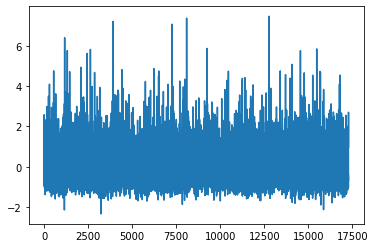

In [112]:
# Set iterations and alpha (learning rate)
alpha = 0.07
iterations = 500


def least_squares(X):
    N = X.shape[0]
    w = np.linalg.inv(X.T @ X) @ X.T @ y
    return w

# Define gradientdescent function
def gradientdescent(X, y, theta, iterations, alpha):
    cost = np.zeros(iterations)
    for i in range(iterations):
        H = X @ theta.T
        theta = theta - (alpha/len(X)) * np.sum(X * (H - y), axis=0)
        cost[i] = computecost(X, y, theta)
    return theta, cost

w1 = least_squares(X)

y = X@w1
print(y[10])
plt.plot(y)



In [25]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

Root Mean Squared Error is: 0.584522648240835


### Least Squares

In [ ]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
""" 
LinearRegress class 

attributes
===========
w nd.array (column vector/matrix)
weights
"""
def __init__(self):
LinearModel.__init__(self)

# train lease-squares model
def train(self, X, T):
X1 = self.add_ones(X)
self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T

# apply the learned model to data X
def use(self, X):
X1 = self.add_ones(X)
return X1 @ self.w
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
"""
Lease Mean Squares. online learning algorithm

attributes
==========
w nd.array
weight matrix
alpha float
learning rate
"""
def __init__(self, alpha):
LinearModel.__init__(self)
self.alpha = alpha

# batch training by using train_step function
def train(self, X, T):
n_records = X.shape[0]
print("X.shape[0]: ", X.shape[0], "X.shape[1]: ", X.shape[1])
print("X: ", X)
self.w = np.random.rand(X.shape[1])
for i in range(n_records):
self.train_step(X[i, :], T[i])

# train LMS model one step 
# here the x is 1d vector
def train_step(self, x, t):
if self.w is None:
self.w = np.random.rand(x.shape[0])
print("x.shape[0]: ", x.shape[0])
print("x: ", x)
y = self.w @ x
self.w -= self.alpha * (y - t) * x

# apply the current model to data X
def use(self, X):
return np.reshape(X @ self.w, (-1,1))


# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        
        w = np.linalg.inv(X.T @ X) @ X.T @ T
        
        y = X@w

        pass  ## TODO: replace this with your codes
    
    # apply the learned model to data X
    def use(self, X):
        pass  ## TODO: replace this with your codes

### Least Mean Squares

In [17]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        pass  ## TODO: replace this with your codes
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        pass  ## TODO: replace this with your codes
    
    # apply the current model to data X
    def use(self, X):
        pass  ## TODO: replace this with your codes
        

### Usage Examples

In [18]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

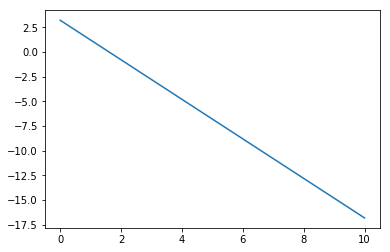

In [20]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

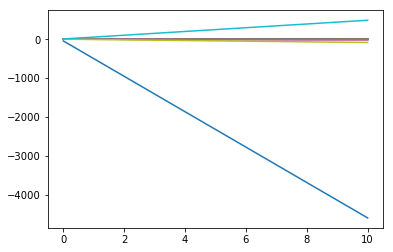

In [21]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

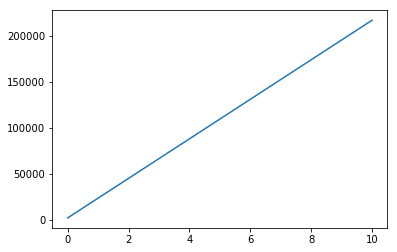

In [22]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

# References

# Extra Credit

If you want to work more for an extra credit, place your work here for additional analysis: weight and residual analysis. 
Try to answer to the following questions: 
- what is the most and least significant features for your data.
- what are the consequences if you remove those features from the model? (Show your work!)
- produce residual plots and observe the patterns for the goodness of fit    
    
**Note: the extra credit is an additional work that needs complete programming, experiments, analysis, and writing to get one. **

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [23]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.
